In [15]:
import os
import numpy as np
from sklearn.decomposition import PCA
import phate
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

sample_to_pop = {}
with open("../input/reference_labels.csv", "r") as f:
    for line in f:
        sample, pop = line.strip().split(",")
        sample_to_pop[sample] = pop

# Recommended colors for each population group
pop_to_color = {"YRI": "blue", "LWK": "blue", "GWD": "blue", 
                "MSL": "blue", "ESN": "blue", "ACB": "blue", "ASW": "blue",  
                "CDX": "green", "CHB": "green", "CHS": "green", "JPT": "green", "KHV": "green",
                "CEU": "yellow", "FIN": "yellow", "GBR": "yellow", "IBS": "yellow", "TSI": "yellow",
                "CLM": "purple", "MXL": "purple", "PEL": "purple", "PUR": "purple",
                "GIH": "orange", "BEB": "orange", "ITU": "orange", "PJL": "orange", "STU": "orange",
                "None": "gray"
               }

colormap = ["blue", "green", "yellow", "purple", "orange"]
samples = [item.strip() for item in open(os.path.join("../input/", "samples.txt"), "r").readlines()]
colors = []
for sample in samples:
    pop = sample_to_pop.get(sample, "None")
    color = pop_to_color[pop]
    colors.append(colormap.index(color))

colormap = np.array(colormap)
    
def compute_PCA(snp_matrix):
    pca = PCA(n_components=2)
    snp_pca = pca.fit_transform(snp_matrix)
    np.savetxt("../output/pca.projection.txt", snp_pca, fmt='%.5f')
    

def compute_Phate(snp_matrix):
    phate_op = phate.PHATE(k=4, t=10, mds="classic", n_jobs=-2)
    snp_phate = phate_op.fit_transform(snp_matrix)
    np.savetxt("../output/ps2_phate.projection.txt", snp_phate, fmt='%.5f')


def kmeans(snp_data, label, outfilename):
    kmeans = KMeans(n_clusters=5)
    kmeans.fit(snp_data)
    y_kmeans = kmeans.predict(snp_data)
    centers = kmeans.cluster_centers_
    fig = plt.figure(figsize=(8,8),dpi=75)
    ax = fig.add_subplot(111)
    ax.scatter(snp_data[:, 0], snp_data[:, 1], c=colormap[y_kmeans], s=5)
    ax.scatter(centers[:, 0], centers[:, 1], c='red', s=200)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_xlabel(label + " 1", size=15)
    ax.set_ylabel(label + " 2", size=15)
    plt.title('Clusters found by KMeans', fontsize=24)
    fig.savefig(outfilename, bbox_inches='tight')


def gmm(snp_data, label, outfilename):
    gmm = GaussianMixture(n_components=5)
    gmm.fit(snp_data)
    y_gmm = gmm.predict(snp_data)
    fig = plt.figure(figsize=(8,8),dpi=75)
    ax = fig.add_subplot(111)
    ax.scatter(snp_data[:, 0], snp_data[:, 1], c=colormap[y_gmm], s=5)
    ax.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=200)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_xlabel(label + " 1", size=15)
    ax.set_ylabel(label + " 2", size=15)
    plt.title('Clusters found by GMM', fontsize=24)
    fig.savefig(outfilename, bbox_inches='tight')


def plot_projection(snp_data, label, outfile):
    snp_data = np.transpose(snp_data)
    p1 = snp_data[0]
    p2 = snp_data[1]
    fig = plt.figure(figsize=(8,8),dpi=75)
    ax = fig.add_subplot(111)
    ax.scatter(p1, p2, c=colormap[colors], s=5)
    ax.set_xlabel(label + " 1", size=15)
    ax.set_ylabel(label + " 2", size=15)
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    leg_el = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 0.4) for key, value in pop_to_color.items()]
    ax.legend(handles = leg_el,loc='upper center', bbox_to_anchor=(1.10, 1.05))
    plt.title(label + ' Projection', fontsize=24)
    fig.savefig(outfile, bbox_inches='tight')


In [6]:
snp_matrix = np.loadtxt('../input/ps2_pca.genotypes.tab')
#snp_matrix = np.loadtxt("../input/merged.tab")
snp_matrix = np.transpose(snp_matrix)

In [8]:
#Run PCA
compute_PCA(snp_matrix)

In [16]:
#Run PHATE
compute_Phate(snp_matrix)

Calculating PHATE...
  Running PHATE on 2504 observations and 28622 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 128.55 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.26 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 128.85 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 81.30 seconds.
    Calculating KMeans...
    Calculated KMeans in 974.80 seconds.
  Calculated landmark operator in 1057.90 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 46.60 seconds.
  Calculating classic MDS...
  Calculated classic MDS in 12.73 seconds.
Calculated PHATE in 1246.10 seconds.


In [21]:
#Load projection data

pca_snp_data = np.loadtxt("../output/pca.projection.txt")
phate_snp_data = np.loadtxt("../output/phate.projection.txt")
tsne_snp_data = np.load("../output/tsne.projection.npy", allow_pickle=True)
tsne_snp_data = tsne_snp_data.item().embedding_
umap_snp_data = np.load("../output/umap.projection.npy", allow_pickle=True)

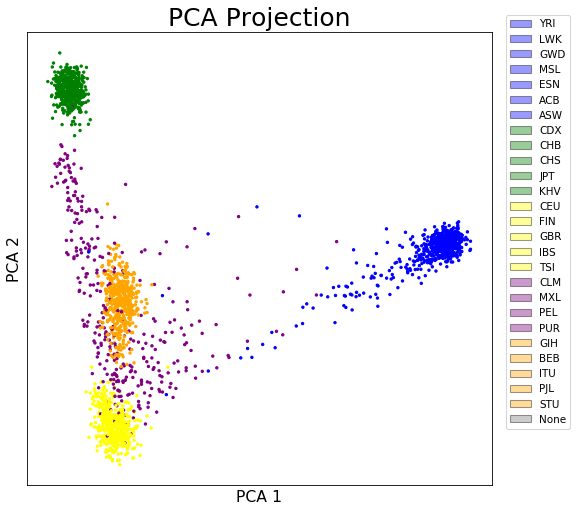

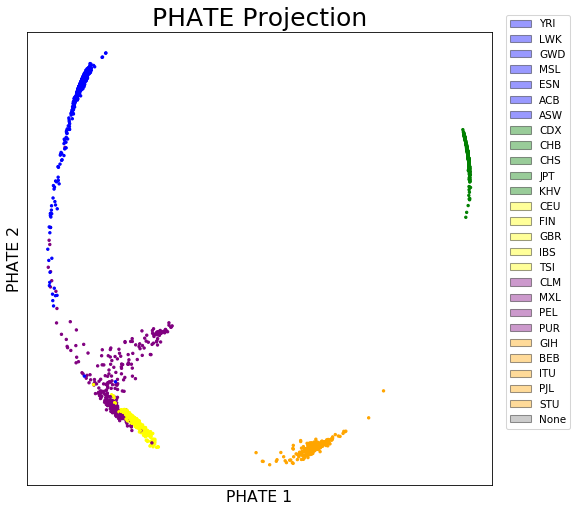

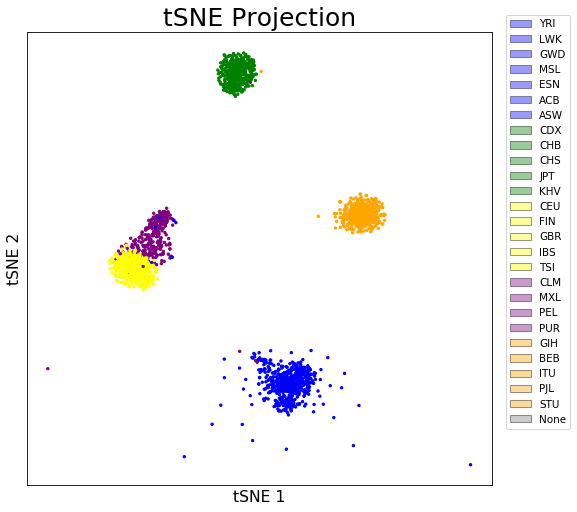

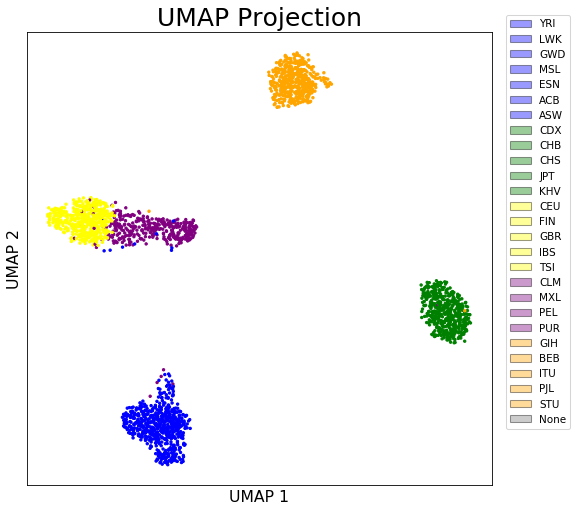

In [22]:
#Load projection data for PS2

pca_snp_data = np.loadtxt("../output/ps2_pca.projection.txt")
phate_snp_data = np.loadtxt("../output/ps2_phate.projection.txt")
tsne_snp_data = np.load("../output/ps2_tsne.projection.npy", allow_pickle=True)
tsne_snp_data = tsne_snp_data.item().embedding_
umap_snp_data = np.load("../output/ps2_umap.projection.npy", allow_pickle=True)

plot_projection(pca_snp_data, "PCA", "../output/ps2_pca.png")
plot_projection(phate_snp_data, "PHATE", "../output/ps2_phate.png")
plot_projection(tsne_snp_data, "tSNE", "../output/ps2_tsne.png")
plot_projection(umap_snp_data, "UMAP", "../output/ps2_umap.png")

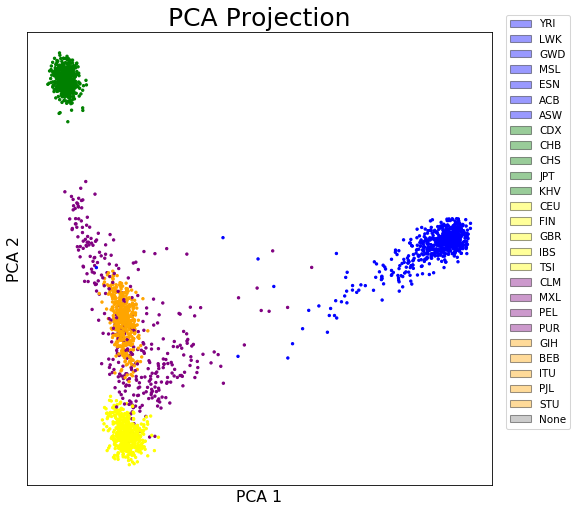

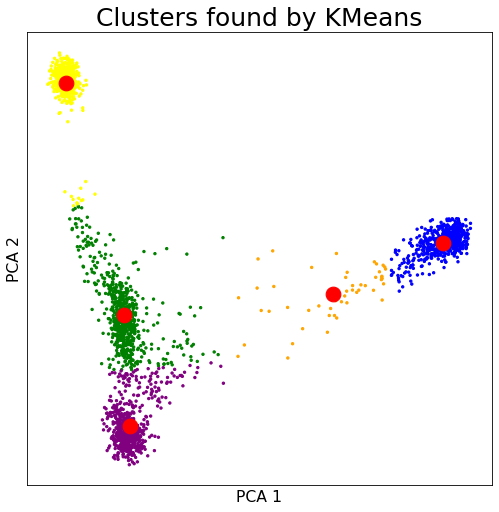

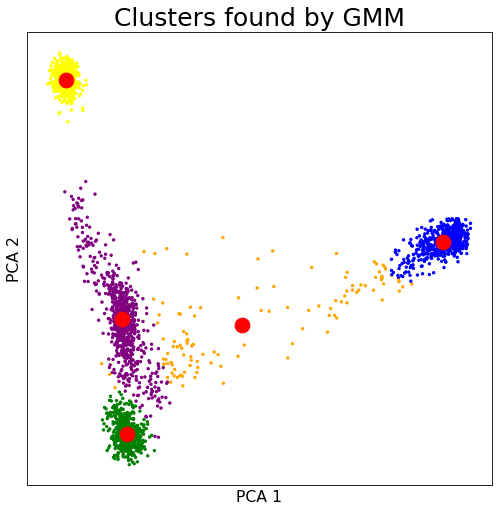

In [115]:
#PCA results

plot_projection(pca_snp_data, "PCA", "../output/pca.png")
kmeans(pca_snp_data, "PCA", "../output/kmeans_pca.png")
gmm(pca_snp_data, "PCA", "../output/gmm_pca.png")

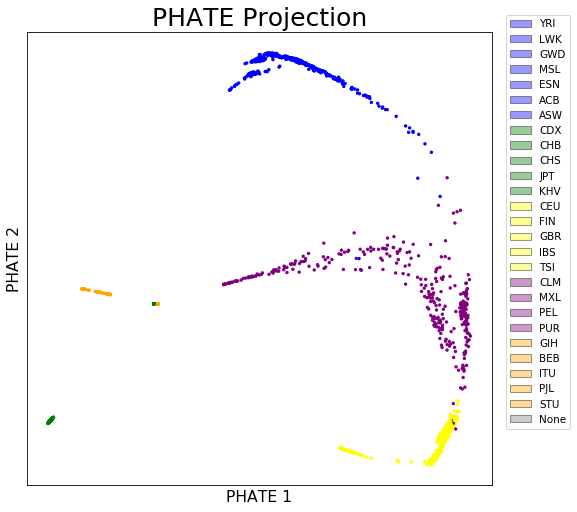

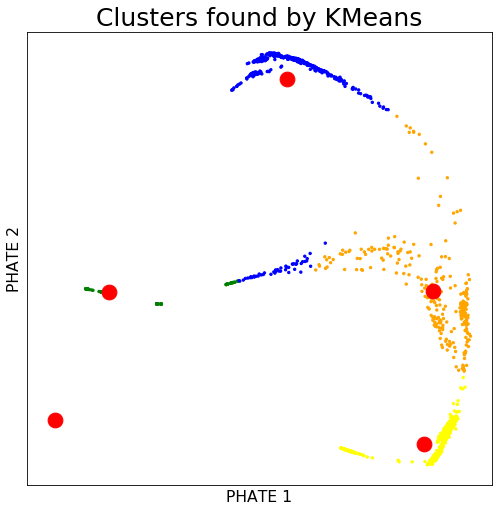

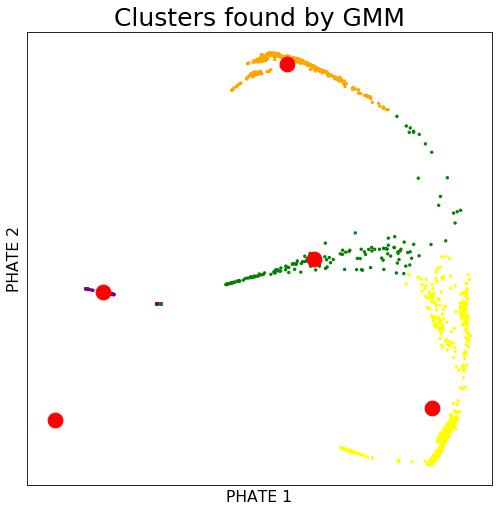

In [138]:
#PHATE results

plot_projection(phate_snp_data, "PHATE", "../output/phate.png")
kmeans(phate_snp_data, "PHATE", "../output/kmeans_phate.png")
gmm(phate_snp_data, "PHATE", "../output/gmm_phate.png")

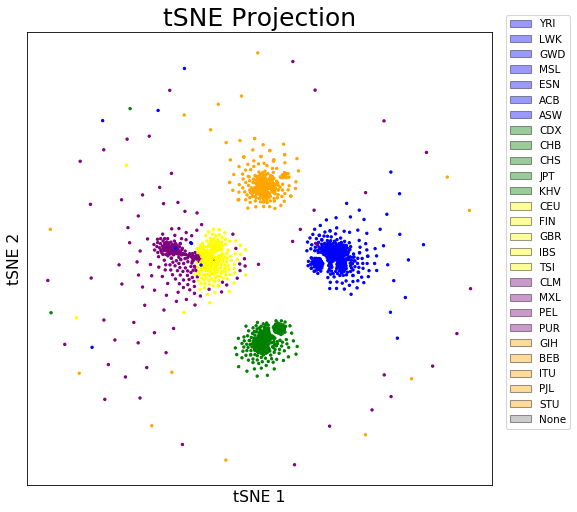

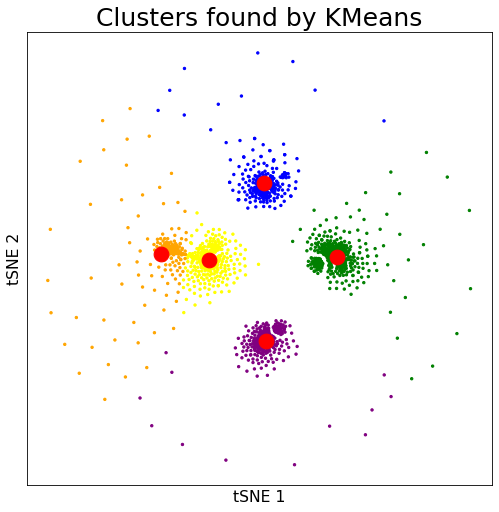

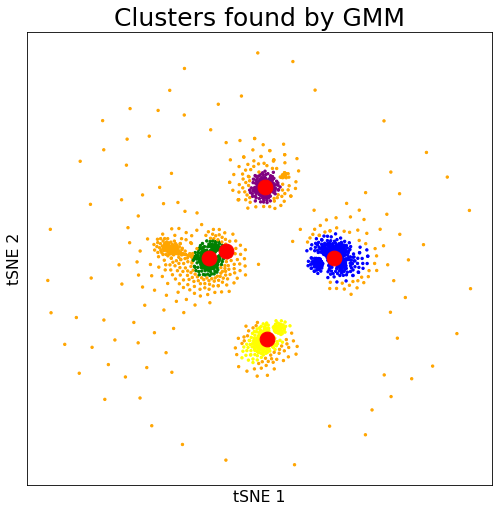

In [117]:
#t-SNE results

plot_projection(tsne_snp_data, "tSNE", "../output/tSNE.png")
kmeans(tsne_snp_data, "tSNE", "../output/kmeans_tsne.png")
gmm(tsne_snp_data, "tSNE", "../output/gmm_tsne.png")

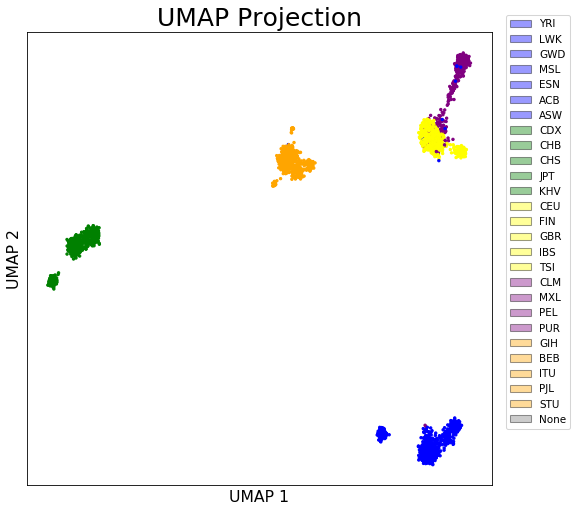

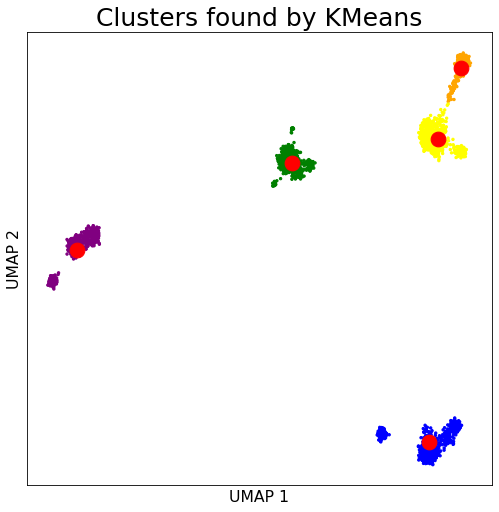

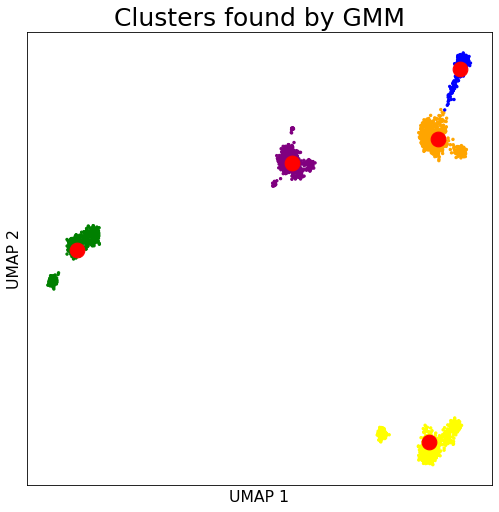

In [5]:
#UMAP results

plot_projection(umap_snp_data, "UMAP", "../output/umap.png")
kmeans(umap_snp_data, "UMAP", "../output/kmeans_umap.png")
gmm(umap_snp_data, "UMAP", "../output/gmm_umap.png")